Declaration de specification de systeme

In [450]:
class terminaux:
    def __init__(self):
        self.duree_globale = 180
        self.temp_ecrit = 30
        self.temp_consul = 10
        self.taille_mess = 300
        self.consom_annu = 3.9
        self.n_destin = 1
        self.duree_vie = 3
        self.taille_PJ = 1000
        self.percent_PJ = 0

    def set_n_destin(self, x):
        self.n_destin = x

    def set_percent_PJ(self, x):
        self.percent_PJ = x
    
    def set_duree_vie(self, x):
        self.duree_vie = x
    
smartphone = terminaux()

print(smartphone.percent_PJ)

0


In [451]:
class server_calcul :
    def __init__(self):
        self.n_vCPU = 24
        self.n_RAM = 96
        self.Av_util = 0.5
        self.watts_vCPU = 3.8
        self.watts_Go = 0.41
        self.die_size = 0.245
        self.die_size_vCPU = 0
        self.die_size_Go = 0.558
        self.n_vCPU_server = 36
        self.n_vCPU_CPU = 32
        self.Go_die_size = 1 / self.die_size_Go
        self.Go_RAMmodule = 32
        self.die_size_vCPU = 0.1225
        self.storage_SSD = 600
        self.n_power_unit = 6
        self.n_blade = 16
        
calcul = server_calcul()
print(calcul.Go_die_size)

1.7921146953405016


In [452]:
class server_stockage :
    def __init__(self):
        self.n_vCPU = 4
        self.n_RAM = 15
        self.storage_SSD = 150
        self.HDD_capacity = 10
        self.SSD_capacity = 6
        self.Av_watts_HDD = 6.5
        self.HDD_consom = self.Av_watts_HDD / self.HDD_capacity
        self.Av_watts_SSD = 6
        self.SSD_consom = self.Av_watts_SSD / self.SSD_capacity
        self.Av_SSD_density = 50.6

stockage = server_stockage()


In [453]:
class donne_generales:
    def __init__(self):
        self.total_mess_jour = 13000
        self.max_mess_jour = 429000
        self.max_node_supp = 71500
        self.ADSL = 40
        self.four_G = 100 - self.ADSL
        self.PUE = 1.09
        self.duree_vie = 4

    def set_total_mess_jour(self,x):
        self.total_mess_jour = x

donne = donne_generales()

Tableau de Reference de donnes

In [454]:
import pandas as pd
#Create the table of the impact
#Reference : Boavizta, ADEME
tableau = {
    "Polution_Type" : ["ADP", "CC", "PE"],
    "CPU" : [0.0204, 9.14, 156],
    "CPU_Die" : [0.00000058, 1.97, 26.5],
    "RAM_bar" : [0.00169, 5.22, 74],
    "RAM_Die" : [0.000063, 2.2, 27.3],
    "SSD" : [0.000563, 6.34, 76.9],
    "SSD_Die" : [0.000063, 2.2, 27.3],
    "HDD" : [0.00025, 31.1, 276],
    "Motherboard" : [0.00369, 66.1, 836],
    "Rack_server" : [0.0202, 150, 2200],
    "Blade_16blade" : [0.432, 880, 12700],
    "Blade_server" : [0.000672, 30.9, 435],
    "Server_Assembly" : [0.00000141, 6.68, 68.6],
    "Power_Supply_Unit" : [0.0083, 24.3, 352],
    "Electricity_France" : [0.000000049, 0.081, 9.3],
    "Electricity_Belgique" : [0.000000034, 0.26, 9],
    "Electricity_Europe" : [0.000000072, 0.53, 8.7],
    "Smartphone" : [0.002955, 82.73, 1093.5],
    "Fixed_network" : [0.000000557, 0.0307, 0.909],
    "Mobile" : [0.000000851, 0.096, 2.91]
}

df = pd.DataFrame(tableau) #Create the table 

Partie Fabrication 

In [455]:
#Fabrication (ADP)

class Fabrication:
    def __init__(self, type, calcul = calcul, stockage = stockage):
        #Declaration
        self.CPU_die = df.loc[df['Polution_Type'] == type, 'CPU_Die'].values[0]
        self.CPU = df.loc[df['Polution_Type'] == type, 'CPU'].values[0]
        self.RAM_bar = df.loc[df['Polution_Type'] == type, 'RAM_bar'].values[0]
        self.RAM_Die= df.loc[df['Polution_Type'] == type, 'RAM_Die'].values[0]
        self.SSD_Die= df.loc[df['Polution_Type'] == type, 'SSD_Die'].values[0]
        self.SSD= df.loc[df['Polution_Type'] == type, 'SSD'].values[0]
        self.motherboard = df.loc[df['Polution_Type'] == type, 'Motherboard'].values[0]
        self.server_assem = df.loc[df['Polution_Type'] == type, 'Server_Assembly'].values[0]
        self.power_unit = df.loc[df['Polution_Type'] == type, 'Power_Supply_Unit'].values[0]
        self.blade_server = df.loc[df['Polution_Type'] == type, 'Blade_server'].values[0]
        self.blade_slots = df.loc[df['Polution_Type'] == type, 'Blade_16blade'].values[0]
        
        #Terminal
        self.terminal= df.loc[df['Polution_Type'] == type, 'Smartphone'].values[0]

        #Reseau
        self.reseau = 0

        #Calcul
        self.calcul_CPU = max (1 , calcul.n_vCPU // calcul.n_vCPU_CPU) * ((calcul.die_size_vCPU*calcul.n_vCPU+0.491)*self.CPU_die + self.CPU)
        self.calcul_RAM = max (1, calcul.n_RAM // calcul.Go_RAMmodule)*(min(calcul.n_RAM, calcul.Go_RAMmodule)/calcul.Go_die_size*self.RAM_Die + self.RAM_bar)
        self.calcul_SSD = calcul.storage_SSD / stockage.Av_SSD_density * self.SSD_Die + self.SSD
        self.calcul_total = calcul.n_vCPU/calcul.n_vCPU_server*(self.motherboard+self.server_assem +calcul.n_power_unit*self.power_unit + self.blade_server + self.blade_slots/16) + self.calcul_CPU + self.calcul_RAM + self.calcul_SSD

        #Stockage
        self.stockage_CPU = max (1 , stockage.n_vCPU // calcul.n_vCPU_CPU) * ((calcul.die_size_vCPU*stockage.n_vCPU+0.491)*self.CPU_die + self.CPU)
        self.stockage_RAM = max (1, stockage.n_RAM // calcul.Go_RAMmodule)*(min(stockage.n_RAM, calcul.Go_RAMmodule)/calcul.Go_die_size*self.RAM_Die + self.RAM_bar)
        self.stockage_SSD = stockage.storage_SSD / stockage.Av_SSD_density * self.SSD_Die + self.SSD
        self.stockage_total = stockage.n_vCPU/calcul.n_vCPU_server*(self.motherboard+self.server_assem +calcul.n_power_unit*self.power_unit + self.blade_server + self.blade_slots/16) + self.stockage_CPU + self.stockage_RAM + self.stockage_SSD



In [456]:
#Fabrication (ADP)

class Fabrication_ADP(Fabrication):
    def __init__(self, type = "ADP"):
        super().__init__(type)
    
fabrication_ADP= Fabrication_ADP()
print(fabrication_ADP.stockage_total)


0.032385794539947305


In [457]:
#Fabrication (CC)

class Fabrication_CC(Fabrication):
    def __init__(self, type = "CC"):
        super().__init__(type)
    
fabrication_CC= Fabrication_CC()
print(fabrication_CC.stockage_total)


81.3994202415459


In [458]:
#Fabrication (PE)

class Fabrication_PE(Fabrication):
    def __init__(self, type = "PE"):
        super().__init__(type)
    
fabrication_PE= Fabrication_PE()
print(fabrication_PE.stockage_total)


1114.0319093104963


Partie Usage

In [459]:
#Usage Generale
class Usage:

    def __init__(self, type, smartphone = smartphone, donne = donne, calcul = calcul):
        
        #Declaration
        self.fixed = df.loc[df['Polution_Type'] == type, 'Fixed_network'].values[0]
        self.mobile = df.loc[df['Polution_Type'] == type, 'Mobile'].values[0]
        self.electric = (df.loc[df['Polution_Type'] == type, 'Electricity_France'].values[0])

        #Reseau
        self.reseau_fixe = donne.total_mess_jour*365*(smartphone.taille_mess/1000000000 + smartphone.percent_PJ*smartphone.taille_PJ/1000000)*donne.ADSL*self.fixed
        self.reseau_mobile = donne.total_mess_jour*365*(smartphone.taille_mess/1000000000 + smartphone.percent_PJ*smartphone.taille_PJ/1000000)*donne.four_G*self.mobile
        self.reseau_total = self.reseau_fixe + self.reseau_mobile
        self.test = smartphone.percent_PJ

        #Terminal
        self.terminal= self.electric*smartphone.consom_annu

        #Server Calcul
        self.calcul = 1.2*donne.PUE*(calcul.n_vCPU*calcul.watts_vCPU + calcul.n_RAM * calcul.watts_Go + calcul.storage_SSD*stockage.Av_watts_SSD/1000) *365*24/1000 * self.electric

        #Server Stockage
        self.stockage = 1.2*donne.PUE*(stockage.n_vCPU*calcul.watts_vCPU + stockage.n_RAM * calcul.watts_Go + stockage.storage_SSD*stockage.Av_watts_SSD/1000) *365*24/1000 * self.electric


In [460]:
#Usage (ADP)
class Usage_ADP (Usage):
    def __init__(self, type = 'ADP'):
        super().__init__(type)

usage_ADP = Usage_ADP()
print(usage_ADP.stockage)
print(usage_ADP.calcul)



1.249217172e-05
7.53235846272e-05


In [461]:
#Usage (CC)
class Usage_CC (Usage):
    def __init__(self, type = 'CC'):
        super().__init__(type)

usage_CC = Usage_CC()
print(usage_CC.stockage)
print(usage_CC.calcul)


20.65032468
124.5144970368


In [462]:
#Usage (PE)

class Usage_PE (Usage):
    def __init__(self, type = 'PE'):
        super().__init__(type)

usage_PE = Usage_PE()
print(usage_PE.stockage)
print(usage_PE.calcul)


2370.963204
14296.10891904


Impact Annuel Treebal

In [463]:
#Impact Annuel en generale


class impact_Annuel:
    def __init__(self, type, usage, fabrication, smartphone=smartphone):
        # Declaration

        self.terminal = df.loc[df['Polution_Type'] == type, 'Smartphone'].values[0]

        # Emetteur
        self.terminal_fabrication = self.terminal / smartphone.duree_vie
        self.terminal_usage = usage.terminal
        self.terminal_total = self.terminal_fabrication + self.terminal_usage

        # Reseau
        self.reseau_fabrication = fabrication.reseau
        self.reseau_usage = usage.reseau_total

        # Calcul
        self.calcul_fabrication = fabrication.calcul_total / donne.duree_vie
        self.calcul_usage = usage.calcul

        # Stockage
        self.stockage_fabrication = fabrication.stockage_total / donne.duree_vie
        self.stockage_usage = usage.stockage
        self.stockage_total = self.stockage_fabrication + self.stockage_usage

In [464]:
class impact_Annuel_ADP(impact_Annuel):
    def __init__(self, type = 'ADP', usage = usage_ADP, fabrication = fabrication_ADP):
        super().__init__(type, usage, fabrication)


impact_annuel_adp = impact_Annuel_ADP()



In [465]:

class impact_Annuel_CC(impact_Annuel):
    def __init__(self, type='CC', usage=usage_CC, fabrication=fabrication_CC):
        usage_CC = Usage_CC()
        fabrication_CC = Fabrication_CC()
        super().__init__(type, usage, fabrication)

impact_annuel_cc = impact_Annuel_CC()

In [466]:
class impact_Annuel_PE(impact_Annuel):
    def __init__(self, type = 'PE', usage = usage_PE, fabrication = fabrication_PE):
        super().__init__(type, usage, fabrication)


impact_annuel_pe = impact_Annuel_PE()

Impact for each functional unit

In [467]:
# Impact unite fonctionnelle en generale
class impact_UF:
    def __init__(self, impact_annuel, smartphone = smartphone, donne = donne):

        # Emetteur
        self.emetteur_fabrication = impact_annuel.terminal_fabrication*(smartphone.temp_ecrit/60/(smartphone.duree_globale*365))
        self.emetteur_usage = impact_annuel.terminal_usage*(smartphone.temp_ecrit/60/(smartphone.duree_globale*365))
        self.emetteur_total = self.emetteur_fabrication + self.emetteur_usage

        #Reseau transmission
        self.reseau_trans_fabrication = impact_annuel_adp.reseau_fabrication / (donne.total_mess_jour*365)
        self.reseau_trans_usage = impact_annuel.reseau_usage / (donne.total_mess_jour*365)
        self.reseau_trans_total = self.reseau_trans_fabrication + self.reseau_trans_usage

        #Calcul
        self.calcul_fabrication = impact_annuel.calcul_fabrication / (donne.total_mess_jour*365)
        self.calcul_usage = impact_annuel.calcul_usage / (donne.total_mess_jour*365)
        self.calcul_total = self.calcul_fabrication + self.calcul_usage

        #Stockage
        self.stockage_fabrication = impact_annuel.stockage_fabrication / (donne.total_mess_jour*365)
        self.stockage_usage = impact_annuel.stockage_usage / (donne.total_mess_jour*365)
        self.stockage_total = self.stockage_fabrication + self.calcul_usage

        
        #Reseau reception
        self.reseau_recep_fabrication =  smartphone.n_destin*impact_annuel.reseau_fabrication / (donne.total_mess_jour*365)
        self.reseau_recep_usage = smartphone.n_destin*impact_annuel.reseau_usage / (donne.total_mess_jour*365)
        self.reseau_recep_total = self.reseau_recep_fabrication + self.reseau_recep_usage

        # Recepteur
        self.recepteur_fabrication = smartphone.n_destin*impact_annuel.terminal_fabrication*(smartphone.temp_consul/60/(smartphone.duree_globale*365))
        self.recepteur_usage =  smartphone.n_destin*impact_annuel.terminal_usage*(smartphone.temp_consul/60/(smartphone.duree_globale*365))
        self.recepteur_total = self.recepteur_fabrication + self.recepteur_usage

        # Total 
        self.total =  self.emetteur_total + self.calcul_total + self.stockage_total + self.reseau_recep_total + self.recepteur_total
        self.usage_total = self.emetteur_usage + self.calcul_usage + self.stockage_usage + self.reseau_trans_usage + self.reseau_recep_usage + self.recepteur_usage

        self.test = smartphone.percent_PJ


In [468]:
class impact_UF_ADP(impact_UF):
    def __init__(self, impact_annuel = impact_annuel_adp):
        super().__init__(impact_annuel)

impact_uf_adp = impact_UF_ADP()
print(impact_uf_adp.recepteur_usage)
print(donne.total_mess_jour)

4.84779299847793e-13
13000


In [469]:
class impact_UF_CC(impact_UF):
    def __init__(self, impact_annuel = impact_annuel_cc):
        super().__init__(impact_annuel)
        
impact_uf_cc = impact_UF_CC()
print(impact_uf_cc.emetteur_total)
print(impact_uf_cc.reseau_trans_total)
print(impact_uf_cc.calcul_total)
print(impact_uf_cc.stockage_total)
print(impact_uf_cc.reseau_recep_total)
print(impact_uf_cc.recepteur_total)


0.00021227219685438861
2.0964e-06
4.651634780482644e-05
3.05298950679002e-05
2.0964e-06
7.075739895146288e-05


In [470]:
class impact_UF_PE(impact_UF):
    def __init__(self, impact_annuel = impact_annuel_pe):
        super().__init__(impact_annuel)

impact_uf_pe = impact_UF_PE()
print(impact_uf_pe.recepteur_total)



0.0010166666666666666


Graph Plot (Impact d'unite fonctionnelle)

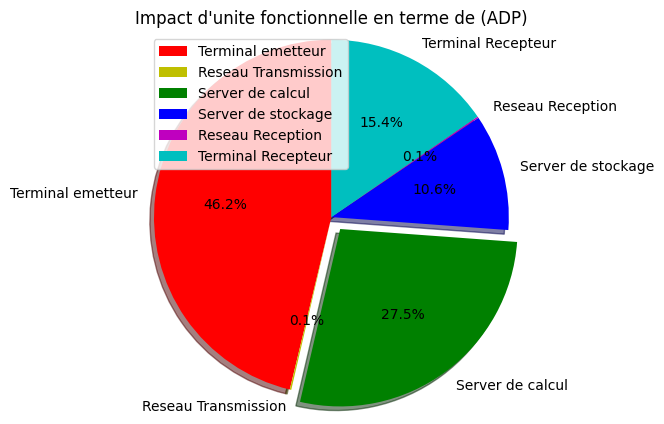

In [471]:
import matplotlib.pyplot as plt

# defining labels
activities = ['Terminal emetteur', 'Reseau Transmission', 'Server de calcul', 'Server de stockage', 'Reseau Reception', 'Terminal Recepteur']

# portion covered by each label
slices = [impact_uf_adp.emetteur_total,
          impact_uf_adp.reseau_trans_total,
          impact_uf_adp.calcul_total,
          impact_uf_adp.stockage_total,
          impact_uf_adp.reseau_recep_total,
          impact_uf_adp.recepteur_total
          ]

# color for each label
colors = ['r', 'y', 'g', 'b', 'm', 'c']

# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors, 
		startangle=90, shadow = True, explode = (0, 0, 0.1, 0, 0, 0),
		radius = 1.2, autopct = '%1.1f%%')

# plotting legend
plt.legend()

plt.title("Impact d'unite fonctionnelle en terme de (ADP)")
# showing the plot
plt.show()


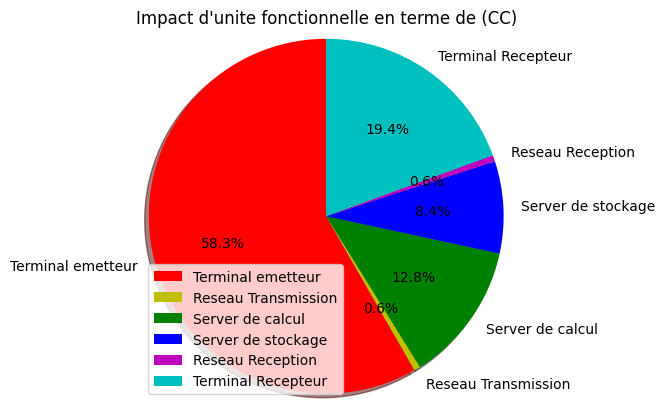

In [472]:
import matplotlib.pyplot as plt

# defining labels
activities = ['Terminal emetteur', 'Reseau Transmission', 'Server de calcul', 'Server de stockage', 'Reseau Reception', 'Terminal Recepteur']

# portion covered by each label
slices = [impact_uf_cc.emetteur_total,
          impact_uf_cc.reseau_trans_total,
          impact_uf_cc.calcul_total,
          impact_uf_cc.stockage_total,
          impact_uf_cc.reseau_recep_total,
          impact_uf_cc.recepteur_total
          ]

# color for each label
colors = ['r', 'y', 'g', 'b', 'm', 'c']

# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors, 
		startangle=90, shadow = True, explode = (0, 0, 0, 0, 0, 0),
		radius = 1.2, autopct = '%1.1f%%')

# plotting legend
plt.legend()

plt.title("Impact d'unite fonctionnelle en terme de (CC)")
# showing the plot
plt.show()


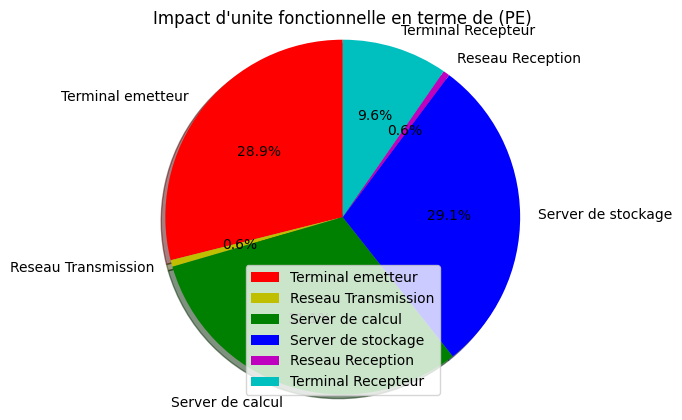

In [473]:
import matplotlib.pyplot as plt

# defining labels
activities = ['Terminal emetteur', 'Reseau Transmission', 'Server de calcul', 'Server de stockage', 'Reseau Reception', 'Terminal Recepteur']

# portion covered by each label
slices = [impact_uf_pe.emetteur_total,
          impact_uf_pe.reseau_trans_total,
          impact_uf_pe.calcul_total,
          impact_uf_pe.stockage_total,
          impact_uf_pe.reseau_recep_total,
          impact_uf_pe.recepteur_total
          ]

# color for each label
colors = ['r', 'y', 'g', 'b', 'm', 'c']

# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors, 
		startangle=90, shadow = True, explode = (0, 0, 0, 0, 0, 0),
		radius = 1.2, autopct = '%1.1f%%')

# plotting legend
plt.legend()

plt.title("Impact d'unite fonctionnelle en terme de (PE)")
# showing the plot
plt.show()


Graph plot (Fabrication vs Utilization)

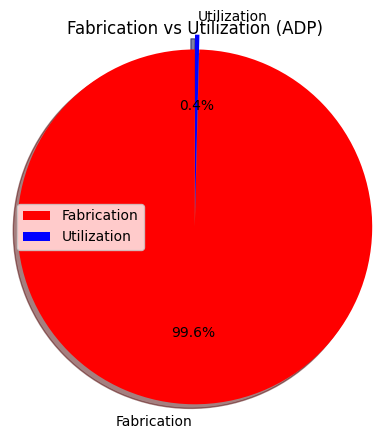

In [474]:
import matplotlib.pyplot as plt

# defining labels
activities = ['Fabrication', 'Utilization']

# portion covered by each label
slices = [impact_uf_adp.emetteur_fabrication + 
          impact_uf_adp.reseau_trans_fabrication +
          impact_uf_adp.calcul_fabrication +
          impact_uf_adp.stockage_fabrication +
          impact_uf_adp.reseau_recep_fabrication +
          impact_uf_adp.recepteur_fabrication,
          impact_uf_adp.emetteur_usage + 
          impact_uf_adp.reseau_trans_usage +
          impact_uf_adp.calcul_usage +
          impact_uf_adp.stockage_usage +
          impact_uf_adp.reseau_recep_usage +
          impact_uf_adp.recepteur_usage,
          ]

# color for each label
colors = ['r', 'b']

# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors, 
		startangle=90, shadow = True, explode = (0, 0.1),
		radius = 1.2, autopct = '%1.1f%%')

# plotting legend
plt.legend()

plt.title("Fabrication vs Utilization (ADP)")
# showing the plot
plt.show()


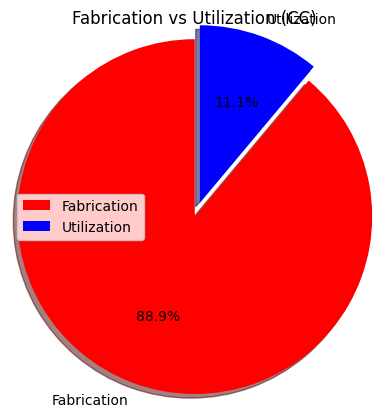

In [475]:
import matplotlib.pyplot as plt

# defining labels
activities = ['Fabrication', 'Utilization']

# portion covered by each label
slices = [impact_uf_cc.emetteur_fabrication + 
          impact_uf_cc.reseau_trans_fabrication +
          impact_uf_cc.calcul_fabrication +
          impact_uf_cc.stockage_fabrication +
          impact_uf_cc.reseau_recep_fabrication +
          impact_uf_cc.recepteur_fabrication,
          impact_uf_cc.emetteur_usage + 
          impact_uf_cc.reseau_trans_usage +
          impact_uf_cc.calcul_usage +
          impact_uf_cc.stockage_usage +
          impact_uf_cc.reseau_recep_usage +
          impact_uf_cc.recepteur_usage,
          ]

# color for each label
colors = ['r', 'b']

# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors, 
		startangle=90, shadow = True, explode = (0, 0.1),
		radius = 1.2, autopct = '%1.1f%%')

# plotting legend
plt.legend()

plt.title("Fabrication vs Utilization (CC)")
# showing the plot
plt.show()


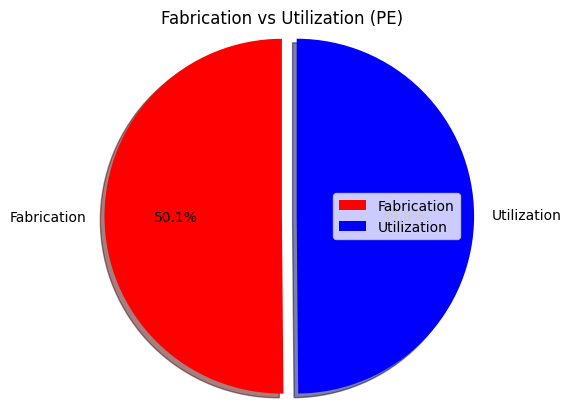

In [476]:
import matplotlib.pyplot as plt

# defining labels
activities = ['Fabrication', 'Utilization']

# portion covered by each label
slices = [impact_uf_pe.emetteur_fabrication + 
          impact_uf_pe.reseau_trans_fabrication +
          impact_uf_pe.calcul_fabrication +
          impact_uf_pe.stockage_fabrication +
          impact_uf_pe.reseau_recep_fabrication +
          impact_uf_pe.recepteur_fabrication,
          impact_uf_pe.emetteur_usage + 
          impact_uf_pe.reseau_trans_usage +
          impact_uf_pe.calcul_usage +
          impact_uf_pe.stockage_usage +
          impact_uf_pe.reseau_recep_usage +
          impact_uf_pe.recepteur_usage,
          ]

# color for each label
colors = ['r', 'b']

# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors, 
		startangle=90, shadow = True, explode = (0, 0.1),
		radius = 1.2, autopct = '%1.1f%%')

# plotting legend
plt.legend()

plt.title("Fabrication vs Utilization (PE)")
# showing the plot
plt.show()


Graph plot (Infrastructure de Treebal - Serveur & Stockage)

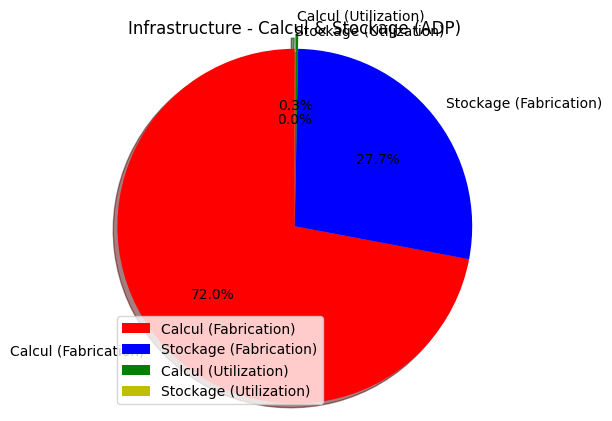

In [477]:
import matplotlib.pyplot as plt

# defining labels
activities = ['Calcul (Fabrication)', 'Stockage (Fabrication)','Calcul (Utilization)', 'Stockage (Utilization)']

# portion covered by each label
slices = [impact_uf_adp.calcul_fabrication,
          impact_uf_adp.stockage_fabrication,
          impact_uf_adp.calcul_usage,
          impact_uf_adp.stockage_usage
          ]

# color for each label
colors = ['r', 'b', 'g', 'y']

# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors, 
		startangle=90, shadow = True, explode = (0, 0, 0.1, 0),
		radius = 1.2, autopct = '%1.1f%%')

# plotting legend
plt.legend()

plt.title("Infrastructure - Calcul & Stockage (ADP)")
# showing the plot
plt.show()


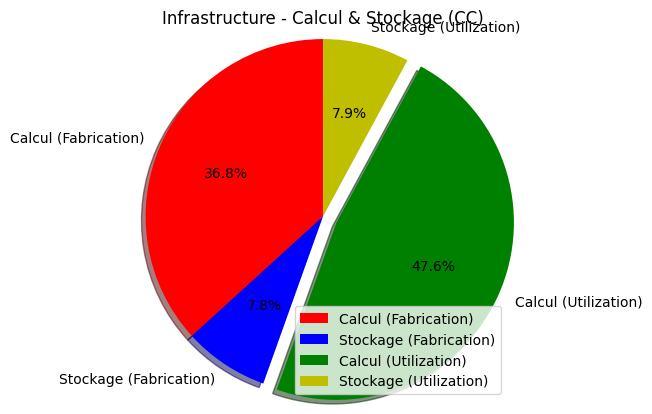

In [478]:
import matplotlib.pyplot as plt

# defining labels
activities = ['Calcul (Fabrication)', 'Stockage (Fabrication)','Calcul (Utilization)', 'Stockage (Utilization)']

# portion covered by each label
slices = [impact_uf_cc.calcul_fabrication,
          impact_uf_cc.stockage_fabrication,
          impact_uf_cc.calcul_usage,
          impact_uf_cc.stockage_usage
          ]

# color for each label
colors = ['r', 'b', 'g', 'y']

# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors, 
		startangle=90, shadow = True, explode = (0, 0, 0.1, 0),
		radius = 1.2, autopct = '%1.1f%%')

# plotting legend
plt.legend()

plt.title("Infrastructure - Calcul & Stockage (CC)")
# showing the plot
plt.show()


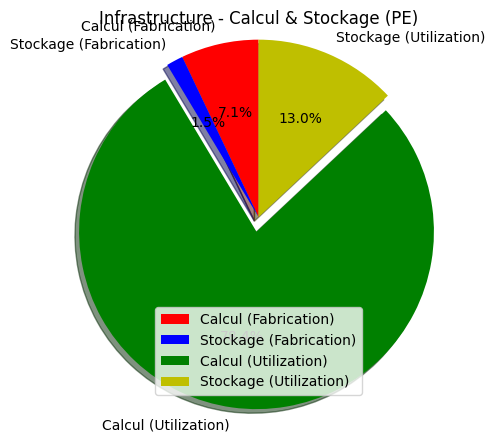

In [479]:
import matplotlib.pyplot as plt

# defining labels
activities = ['Calcul (Fabrication)', 'Stockage (Fabrication)','Calcul (Utilization)', 'Stockage (Utilization)']

# portion covered by each label
slices = [impact_uf_pe.calcul_fabrication,
          impact_uf_pe.stockage_fabrication,
          impact_uf_pe.calcul_usage,
          impact_uf_pe.stockage_usage
          ]

# color for each label
colors = ['r', 'b', 'g', 'y']

# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors, 
		startangle=90, shadow = True, explode = (0, 0, 0.1, 0),
		radius = 1.2, autopct = '%1.1f%%')

# plotting legend
plt.legend()

plt.title("Infrastructure - Calcul & Stockage (PE)")
# showing the plot
plt.show()


Impact unite fonctionnelle (10 destinataires)

In [480]:
smartphone.set_n_destin(10) #Changer le valeur de destinataire

#Initialisation nouveau objet en utilisant le nouveau valeur de destination
impact_uf_adp_ten = impact_UF_ADP()
impact_uf_cc_ten = impact_UF_CC()
impact_uf_pe_ten = impact_UF_PE()


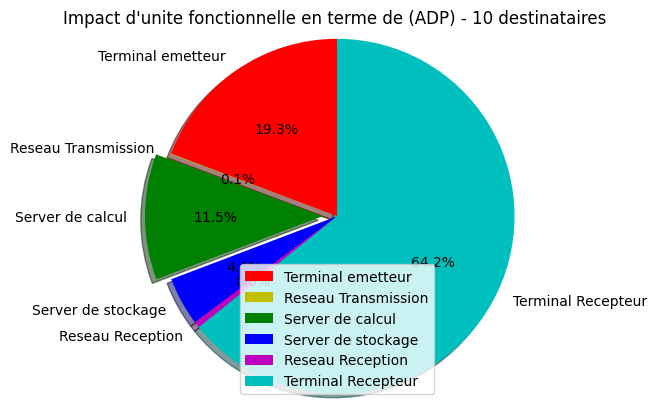

In [481]:
import matplotlib.pyplot as plt

# defining labels
activities = ['Terminal emetteur', 'Reseau Transmission', 'Server de calcul', 'Server de stockage', 'Reseau Reception', 'Terminal Recepteur']

# portion covered by each label
slices = [impact_uf_adp_ten.emetteur_total,
          impact_uf_adp_ten.reseau_trans_total,
          impact_uf_adp_ten.calcul_total,
          impact_uf_adp_ten.stockage_total,
          impact_uf_adp_ten.reseau_recep_total,
          impact_uf_adp_ten.recepteur_total
          ]

# color for each label
colors = ['r', 'y', 'g', 'b', 'm', 'c']

# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors, 
		startangle=90, shadow = True, explode = (0, 0, 0.1, 0, 0, 0),
		radius = 1.2, autopct = '%1.1f%%')

# plotting legend
plt.legend()

plt.title("Impact d'unite fonctionnelle en terme de (ADP) - 10 destinataires ")
# showing the plot
plt.show()


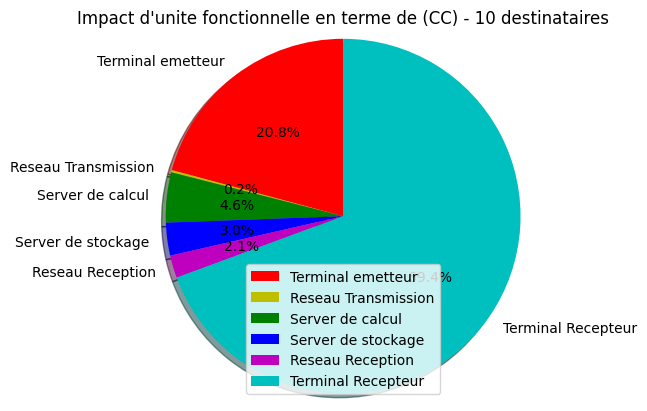

In [482]:
import matplotlib.pyplot as plt

# defining labels
activities = ['Terminal emetteur', 'Reseau Transmission', 'Server de calcul', 'Server de stockage', 'Reseau Reception', 'Terminal Recepteur']

# portion covered by each label
slices = [impact_uf_cc_ten.emetteur_total,
          impact_uf_cc_ten.reseau_trans_total,
          impact_uf_cc_ten.calcul_total,
          impact_uf_cc_ten.stockage_total,
          impact_uf_cc_ten.reseau_recep_total,
          impact_uf_cc_ten.recepteur_total
          ]

# color for each label
colors = ['r', 'y', 'g', 'b', 'm', 'c']

# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors, 
		startangle=90, shadow = True, explode = (0, 0, 0, 0, 0, 0),
		radius = 1.2, autopct = '%1.1f%%')

# plotting legend
plt.legend()

plt.title("Impact d'unite fonctionnelle en terme de (CC) - 10 destinataires")
# showing the plot
plt.show()


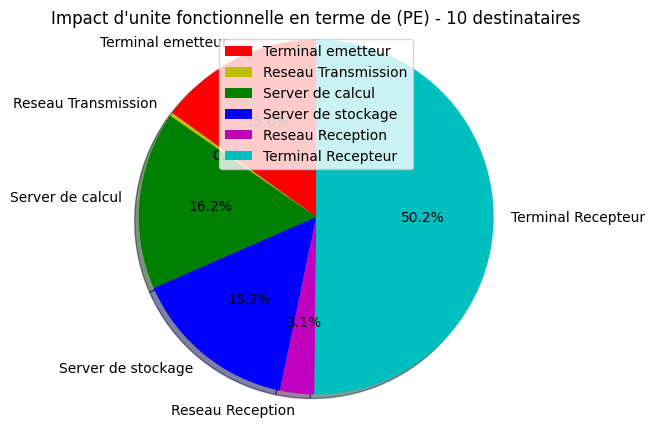

In [483]:
import matplotlib.pyplot as plt

# defining labels
activities = ['Terminal emetteur', 'Reseau Transmission', 'Server de calcul', 'Server de stockage', 'Reseau Reception', 'Terminal Recepteur']

# portion covered by each label
slices = [impact_uf_pe_ten.emetteur_total,
          impact_uf_pe_ten.reseau_trans_total,
          impact_uf_pe_ten.calcul_total,
          impact_uf_pe_ten.stockage_total,
          impact_uf_pe_ten.reseau_recep_total,
          impact_uf_pe_ten.recepteur_total
          ]

# color for each label
colors = ['r', 'y', 'g', 'b', 'm', 'c']

# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors, 
		startangle=90, shadow = True, explode = (0, 0, 0, 0, 0, 0),
		radius = 1.2, autopct = '%1.1f%%')

# plotting legend
plt.legend()

plt.title("Impact d'unite fonctionnelle en terme de (PE) - 10 destinataires")
# showing the plot
plt.show()


Impact unite fonctionnelle en changeant le nombre de destinataires

In [484]:
#Changer le valeur de destinataire = 2
smartphone.set_n_destin(2)

#Initialisation nouveau objet en utilisant le nouveau valeur de destination
impact_uf_adp_two = impact_UF_ADP()
impact_uf_cc_two = impact_UF_CC()
impact_uf_pe_two = impact_UF_PE()


#Changer le valeur de destinataire = 5
smartphone.set_n_destin(5)

#Initialisation nouveau objet en utilisant le nouveau valeur de destination
impact_uf_adp_five = impact_UF_ADP()
impact_uf_cc_five = impact_UF_CC()
impact_uf_pe_five = impact_UF_PE()

#Changer le valeur de destinataire = 20
smartphone.set_n_destin(20)

#Initialisation nouveau objet en utilisant le nouveau valeur de destination
impact_uf_adp_twenty = impact_UF_ADP()
impact_uf_cc_twenty = impact_UF_CC()
impact_uf_pe_twenty = impact_UF_PE()

#Changer le valeur de destinataire = 50
smartphone.set_n_destin(50)

#Initialisation nouveau objet en utilisant le nouveau valeur de destination
impact_uf_adp_fifty = impact_UF_ADP()
impact_uf_cc_fifty = impact_UF_CC()
impact_uf_pe_fifty = impact_UF_PE()


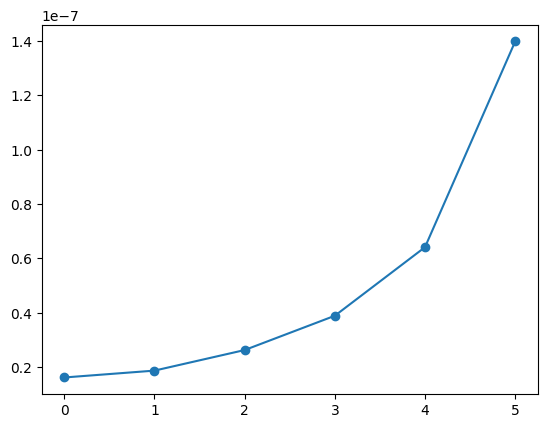

In [485]:

import matplotlib.pyplot as plt
import numpy as np

ypoints = np.array([
    impact_uf_adp.total,
    impact_uf_adp_two.total,
    impact_uf_adp_five.total,
    impact_uf_adp_ten.total,
    impact_uf_adp_twenty.total,
    impact_uf_adp_fifty.total
])

plt.plot(ypoints, marker = 'o')
plt.show()

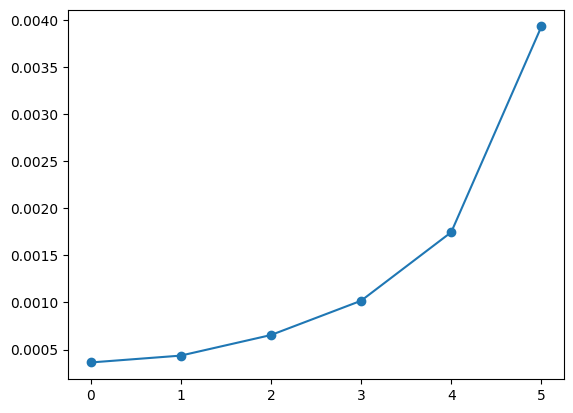

In [486]:
import matplotlib.pyplot as plt
import numpy as np

ypoints = np.array([
    impact_uf_cc.total,
    impact_uf_cc_two.total,
    impact_uf_cc_five.total,
    impact_uf_cc_ten.total,
    impact_uf_cc_twenty.total,
    impact_uf_cc_fifty.total
])

plt.plot(ypoints, marker = 'o')
plt.show()

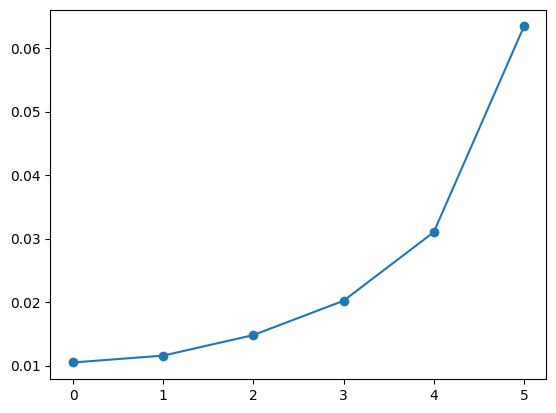

In [487]:
import matplotlib.pyplot as plt
import numpy as np

ypoints = np.array([
    impact_uf_pe.total,
    impact_uf_pe_two.total,
    impact_uf_pe_five.total,
    impact_uf_pe_ten.total,
    impact_uf_pe_twenty.total,
    impact_uf_pe_fifty.total
])

plt.plot(ypoints, marker = 'o')
plt.show()

Graph Plot of augmentation of the effect of the number of destination (n = ) in percent 

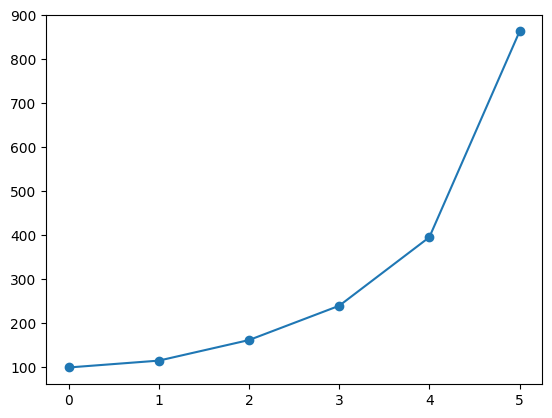

In [488]:
import matplotlib.pyplot as plt
import numpy as np

ratio = impact_uf_adp.total / 100

ypoints = np.array([
    impact_uf_adp.total / ratio,
    impact_uf_adp_two.total / ratio,
    impact_uf_adp_five.total / ratio,
    impact_uf_adp_ten.total / ratio,
    impact_uf_adp_twenty.total / ratio,
    impact_uf_adp_fifty.total / ratio
])

plt.plot(ypoints, marker = 'o')
plt.show()

0.003932008387300259
1.6196640615291655e-08


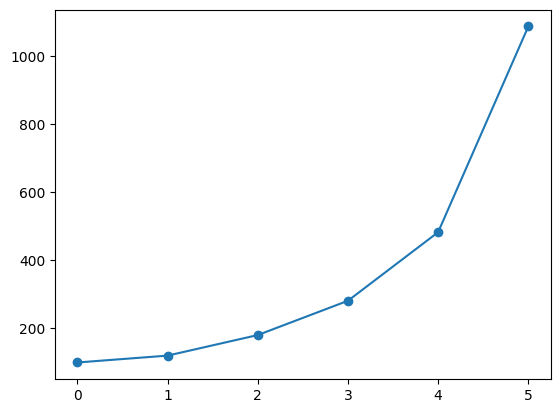

In [489]:
import matplotlib.pyplot as plt
import numpy as np

ratio = impact_uf_cc.total / 100

ypoints = np.array([
    impact_uf_cc.total / ratio,
    impact_uf_cc_two.total / ratio,
    impact_uf_cc_five.total / ratio,
    impact_uf_cc_ten.total / ratio,
    impact_uf_cc_twenty.total / ratio,
    impact_uf_cc_fifty.total / ratio
])

print(impact_uf_cc_fifty.total)
print(impact_uf_adp.total)

plt.plot(ypoints, marker = 'o')
plt.show()

0.06340416536231033


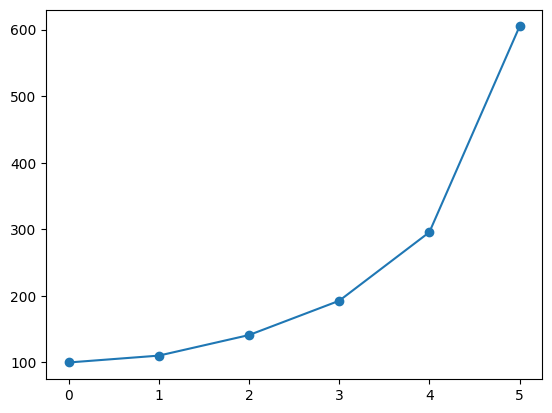

In [490]:
import matplotlib.pyplot as plt
import numpy as np

ratio = impact_uf_pe.total / 100

ypoints = np.array([
    impact_uf_pe.total / ratio,
    impact_uf_pe_two.total / ratio,
    impact_uf_pe_five.total / ratio,
    impact_uf_pe_ten.total / ratio,
    impact_uf_pe_twenty.total / ratio,
    impact_uf_pe_fifty.total / ratio
])
print (impact_uf_pe_fifty.total)
plt.plot(ypoints, marker = 'o')
plt.show()

Impact of the augmentation of number of messages

[2.7859402975275245e-08, 1.2967350803986773e-08, 6.072133659055208e-09, 2.9331813937930592e-09, 1.4408693379628934e-09, 7.140043292480378e-10, 6.637727450181806e-10, 4.745739217801565e-10, 3.553945796906666e-10, 2.840584501631969e-10, 2.3657247869747723e-10, 2.0268892269670283e-10, 1.5755621197774016e-10, 1.288623894897146e-10, 9.445751575276667e-11, 7.082170234879696e-11, 4.720017858867929e-11, 3.539477532506496e-11, 2.8313248124158603e-11]


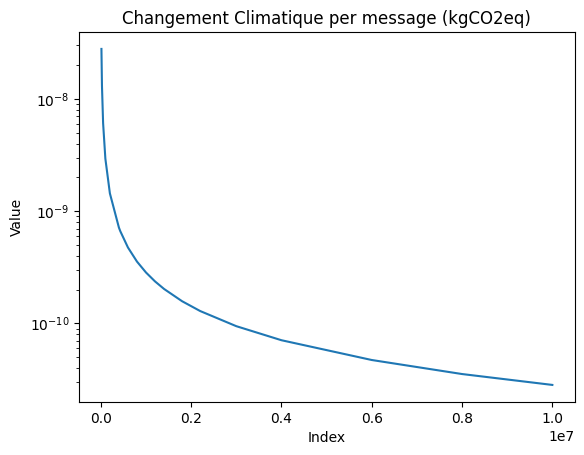

In [495]:
set = []
message = [
        13000,
        25000,
        50000,
        100000,
        200000,
        400000,
        430000,
        600000,
        800000,
        1000000,
        1200000,
        1400000,
        1800000,
        2200000,
        3000000,
        4000000,
        6000000,
        8000000,
        10000000
        ]
smartphone.set_n_destin(1)

for i in message:
    donne.set_total_mess_jour(i)
    impact_uf_cc_test = impact_UF_CC()
    set.append((impact_uf_cc_test.total)/i)

print(set)


import matplotlib.pyplot as plt

# Plot the values
plt.plot(message, set)
plt.yscale('log')
# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Changement Climatique per message (kgCO2eq)')

# Show plot
plt.show()



Impact unite fonctionnelle en augmentant le pourcentage de messages avec piece jointe

9.947418
9.947418
9.947418
9.947418
9.947418
9.947418
9.947418
[0.00028313248124158604, 0.00028313248124158604, 0.00028313248124158604, 0.00028313248124158604, 0.00028313248124158604, 0.00028313248124158604, 0.00028313248124158604]


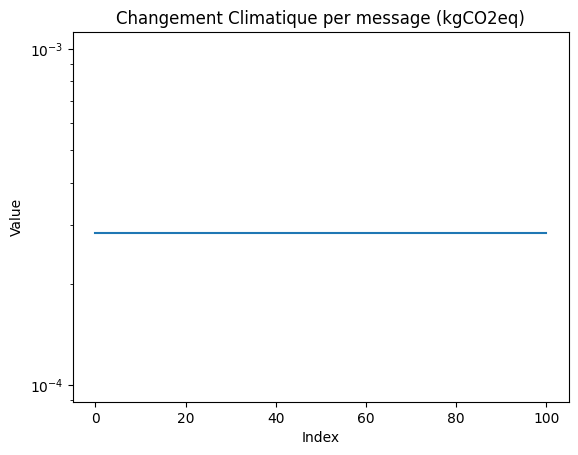

In [492]:
set = []
message = [
        0,
        10,
        20,
        30,
        50,
        75,
        100
        ]


for i in message:
    smartphone.set_percent_PJ(i)
    usage_test = Usage_CC()  # Reinitialize Usage_CC with updated percent_PJ
    fabrication_CC = Fabrication_CC()  # Reinitialize Fabrication_CC if needed
    impact_ann_cc = impact_Annuel_CC()  # Pass updated usage_test here
    #print(usage_test.reseau_fixe)
    print(impact_ann_cc.reseau_usage)
    impact_uf_cc_test = impact_UF_CC()
    #print(impact_uf_cc_test.test)
    set.append(impact_uf_cc_test.total)


print(set)

import matplotlib.pyplot as plt

# Plot the values
plt.plot(message, set)
plt.yscale('log')
# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Changement Climatique per message (kgCO2eq)')

# Show plot
plt.show()



Impact unite fonctionnelle analyse de sensibilite sur la duree de vie des terminaux

[0.00028313248124158604, 0.00028313248124158604, 0.00028313248124158604, 0.00028313248124158604]


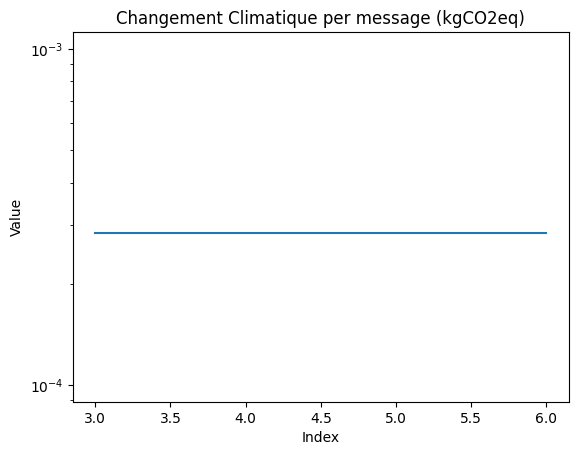

In [494]:
set = []
vie = [3,4,5,6]

for i in vie:
    smartphone.set_duree_vie(i)
    impact_uf_cc_test = impact_UF_CC()
    set.append(impact_uf_cc_test.total)

print(set)

import matplotlib.pyplot as plt

# Plot the values
plt.plot(vie, set)
plt.yscale('log')
# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Changement Climatique per message (kgCO2eq)')

# Show plot
plt.show()

